In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [40]:
district_IPC=pd.read_csv(r"C:\Users\chaud\Downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
district_IPC

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [41]:
sc_crime=pd.read_csv(r"C:\Users\chaud\Downloads\India_Crime -Zip\India_Crime - Copy\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
sc_crime.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [42]:
st_crime=pd.read_csv(r"C:\Users\chaud\Downloads\India_Crime -Zip\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
st_crime.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [43]:
children_crime=pd.read_csv(r"C:\Users\chaud\Downloads\India_Crime -Zip\India_Crime - Copy\03_District_wise_crimes_committed_against_children_2001_2012.csv")
children_crime.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total Crime Against Children
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
women_crime=pd.read_csv(r"C:\Users\chaud\Downloads\India_Crime -Zip\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv")
women_crime.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [45]:
df = district_IPC.merge(sc_crime, on=['STATE/UT', 'DISTRICT', 'Year'], how='left')
df = df.merge(st_crime, on=['STATE/UT', 'DISTRICT', 'Year'], how='left')
df = df.merge(children_crime, on=['STATE/UT', 'DISTRICT', 'Year'], how='left')
df = df.merge(women_crime, on=['STATE/UT', 'DISTRICT', 'Year'], how='left')

In [46]:
df

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,Prohibition of child marriage act,Other Crimes,Total Crime Against Children,Rape_y,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,0.0,0.0,0.0,50.0,30.0,16.0,149.0,34.0,175.0,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,0.0,0.0,66.0,23.0,30.0,7.0,118.0,24.0,154.0,0.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,0.0,0.0,0.0,27.0,34.0,14.0,112.0,83.0,186.0,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,0.0,0.0,0.0,20.0,20.0,17.0,126.0,38.0,57.0,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,0.0,0.0,0.0,23.0,26.0,12.0,109.0,58.0,247.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9025,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0.0,1.0,7.0,6.0,2.0,0.0,2.0,0.0,1.0,0.0
9027,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,1.0,2.0,25.0,7.0,14.0,0.0,7.0,2.0,5.0,0.0


In [47]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Murder_x', 'Rape_x', 'Kidnapping and Abduction_x', 'Dacoity_x',
       'Robbery_x', 'Arson_x', 'Hurt_x',
       'Prevention of atrocities (POA) Act_x',
       'Protection of Civil R

In [48]:
columns_to_drop = [ 
    'Murder_x', 'Rape_x', 'Kidnapping and Abduction_x', 'Dacoity_x',
    'Robbery_x', 'Arson_x', 'Hurt_x',
    'Prevention of atrocities (POA) Act_x',
    'Protection of Civil Rights (PCR) Act_x', 'Other Crimes Against SCs',
    'Murder_y', 'Rape_y', 'Kidnapping Abduction', 'Dacoity_y', 'Robbery_y',
    'Arson_y', 'Hurt_y', 'Protection of Civil Rights (PCR) Act_y',
    'Prevention of atrocities (POA) Act_y', 'Other Crimes Against STs',
    'Murder', 'Rape_x', 'Kidnapping and Abduction_y', 'Foeticide',
    'Abetment of suicide', 'Exposure and abandonment',
    'Procuration of minor girls', 'Buying of girls for prostitution',
    'Selling of girls for prostitution',
    'Prohibition of child marriage act', 'Other Crimes', 'Rape_y',
    'Kidnapping and Abduction', 'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

df_Crime = df.drop(columns=columns_to_drop, errors='ignore')

df_Crime

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0.0
9025,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0.0
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,7.0
9027,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,632,0,7,2,5,0,219,1668,3494,25.0


In [49]:
df_Crime = df_Crime[df_Crime['DISTRICT']!= 'TOTAL']

In [50]:
df_Crime

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,NaN
9023,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,227,18,53,6,327,0,292,1144,5558,NaN
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0.0
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,7.0


In [54]:
df_Crime.isna().sum()

STATE/UT                                                 0
DISTRICT                                                 0
Year                                                     0
MURDER                                                   0
ATTEMPT TO MURDER                                        0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                0
RAPE                                                     0
CUSTODIAL RAPE                                           0
OTHER RAPE                                               0
KIDNAPPING & ABDUCTION                                   0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS              0
KIDNAPPING AND ABDUCTION OF OTHERS                       0
DACOITY                                                  0
PREPARATION AND ASSEMBLY FOR DACOITY                     0
ROBBERY                                                  0
BURGLARY                                                 0
THEFT                                                   

In [56]:
df_Crime = df_Crime.dropna()
df_Crime

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,66.0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,DAMAN & DIU,DAMAN,2012,3,4,0,5,0,5,2,...,15,0,0,0,1,0,29,34,202,7.0
9004,DAMAN & DIU,DIU,2012,0,1,0,0,0,0,1,...,2,0,0,0,2,0,9,12,37,1.0
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0.0
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,7.0


### 4.1  Create 3 clusters as below.
#### 1. Sensitive Area's
#### 2. Moderate Area's
#### 3. Peaceful Area's"

In [67]:
numeric_cols = df_Crime.select_dtypes(include=['float64', 'int64']).columns
clustering_data = df_Crime[numeric_cols]

In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [70]:
df_Crime['Cluster'] = clusters

In [71]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = ['Sensitive Areas', 'Moderate Areas', 'Peaceful Areas']

In [72]:
for i in range(3):
    print(f"Cluster {i} center:", cluster_centers[i])

Cluster 0 center: [-0.04958866 -0.39069327 -0.33075333 -0.20290709 -0.35849354 -0.02173853
 -0.35848479 -0.35346689 -0.32564486 -0.25415682 -0.22285963 -0.12583643
 -0.27053209 -0.29796337 -0.26061531 -0.23482567 -0.24856058 -0.28459946
 -0.26644422 -0.26353439 -0.16234916 -0.17052699 -0.33230734 -0.32864238
 -0.36341618 -0.19025805 -0.31139825 -0.03737954 -0.33137204 -0.32501463
 -0.40550358 -0.28713058]
Cluster 1 center: [0.30396012 2.88220806 2.36076664 1.46472987 2.39241222 0.04521528
 2.39261405 3.51515399 2.85002504 3.38039727 1.79066227 2.82142329
 4.12842013 3.97650359 5.16376216 4.93168595 4.71443277 2.10457667
 4.33088998 4.47622814 3.51203061 0.23434471 2.6258927  1.90965582
 2.01231168 1.47644289 3.62786587 0.33001106 1.98739626 3.02744458
 4.50998252 2.85197349]
Cluster 2 center: [0.10620931 0.80574059 0.68717304 0.42051044 0.75540307 0.0521677
 0.75536806 0.67115282 0.64307003 0.42825638 0.45027317 0.13892137
 0.42207223 0.50121335 0.33100638 0.28048364 0.32910381 0.58661

In [73]:
df_Crime['Cluster_Label'] = df_Crime['Cluster'].map({
    0: 'Sensitive Areas',
    1: 'Moderate Areas',
    2: 'Peaceful Areas'
})

In [76]:
df_Crime[['STATE/UT','DISTRICT','Cluster', 'Cluster_Label']]


,STATE/UT,DISTRICT,Cluster,Cluster_Label
0,ANDHRA PRADESH,ADILABAD,2,Peaceful Areas
1,ANDHRA PRADESH,ANANTAPUR,2,Peaceful Areas
2,ANDHRA PRADESH,CHITTOOR,2,Peaceful Areas
3,ANDHRA PRADESH,CUDDAPAH,0,Sensitive Areas
4,ANDHRA PRADESH,EAST GODAVARI,2,Peaceful Areas
...,...,...,...,...
9003,DAMAN & DIU,DAMAN,0,Sensitive Areas
9004,DAMAN & DIU,DIU,0,Sensitive Areas
9024,LAKSHADWEEP,LAKSHADWEEP,0,Sensitive Areas
9026,PUDUCHERRY,KARAIKAL,0,Sensitive Areas


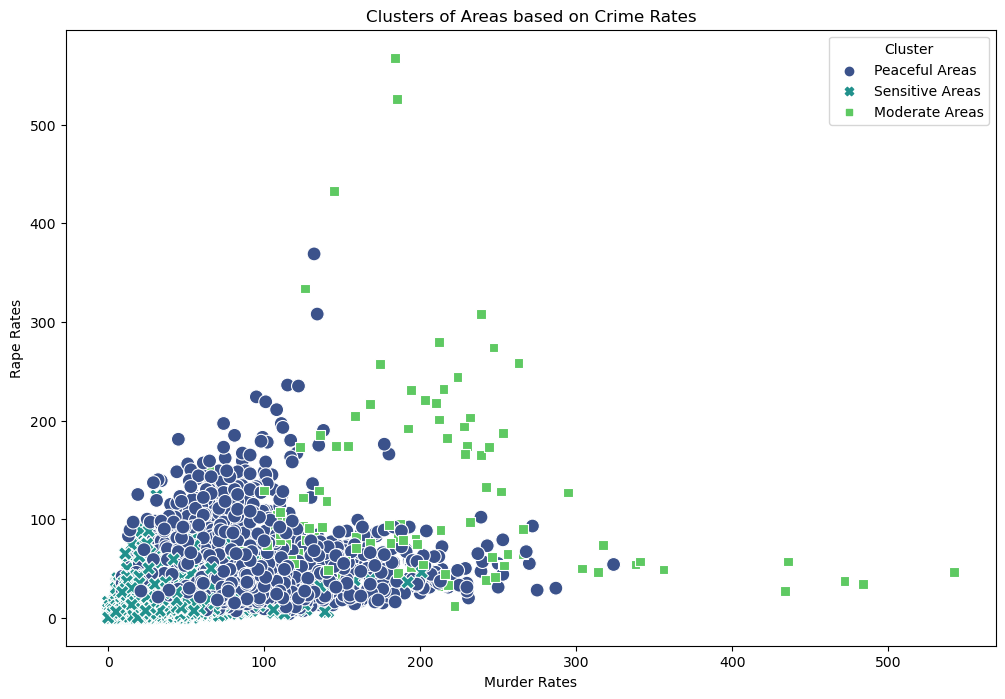

In [95]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_Crime, 
    x='MURDER', 
    y='RAPE', 
    hue='Cluster_Label', 
    palette='viridis',
    style='Cluster_Label',
    s=100
)

plt.title('Clusters of Areas based on Crime Rates')
plt.xlabel('Murder Rates')
plt.ylabel('Rape Rates')
plt.legend(title='Cluster')
plt.show()

### 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [77]:
sensitive_regions=df_Crime[df_Crime['Cluster_Label']=='Sensitive Areas']
sensitive_regions

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children,Cluster,Cluster_Label
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,126,38,57,0,233,1181,3140,0.0,0,Sensitive Areas
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,0,0,4,104,287,0.0,0,Sensitive Areas
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,0,0,...,0,1,0,0,6,68,439,0.0,0,Sensitive Areas
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,4,8,0,8,12,...,38,47,108,0,167,926,2572,0.0,0,Sensitive Areas
22,ANDHRA PRADESH,VIJAYAWADA RLY.,2001,2,1,0,1,0,1,0,...,1,1,0,0,2,25,320,0.0,0,Sensitive Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,DAMAN & DIU,DAMAN,2012,3,4,0,5,0,5,2,...,0,0,1,0,29,34,202,7.0,0,Sensitive Areas
9004,DAMAN & DIU,DIU,2012,0,1,0,0,0,0,1,...,0,0,2,0,9,12,37,1.0,0,Sensitive Areas
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,1,0,1,0,0,32,60,0.0,0,Sensitive Areas
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,2,0,1,0,44,392,787,7.0,0,Sensitive Areas


In [78]:
moderate_regions=df_Crime[df_Crime['Cluster_Label']=='Moderate Areas']
moderate_regions

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children,Cluster,Cluster_Label
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,118,27,746,0,409,1512,11831,25.0,1,Moderate Areas
102,BIHAR,PATNA,2001,434,581,30,27,0,27,197,...,47,0,152,39,178,2825,8583,8.0,1,Moderate Areas
139,GUJARAT,AHMEDABAD COMMR.,2001,90,58,60,39,0,39,143,...,54,27,530,0,0,6129,13496,77.0,1,Moderate Areas
258,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,223,51,229,0,38,11106,27254,6.0,1,Moderate Areas
373,MAHARASHTRA,MUMBAI,2001,295,200,6,127,0,127,148,...,274,44,198,0,709,6095,28968,159.0,1,Moderate Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8965,WEST BENGAL,24 PARGANAS NORTH,2012,140,108,80,118,0,118,497,...,196,1,1860,3,10,6062,11765,375.0,1,Moderate Areas
8966,WEST BENGAL,24 PARGANAS SOUTH,2012,224,8,28,244,0,244,419,...,83,0,1666,0,70,7641,14370,19.0,1,Moderate Areas
8983,WEST BENGAL,KOLKATA,2012,85,154,29,68,0,68,271,...,486,377,865,9,507,10903,25370,229.0,1,Moderate Areas
8985,WEST BENGAL,MURSHIDABAD,2012,174,395,30,257,0,257,579,...,609,6,2831,0,347,2489,12713,402.0,1,Moderate Areas


In [79]:
peaceful_regions=df_Crime[df_Crime['Cluster_Label']=='Peaceful Areas']
peaceful_regions

,STATE/UT,DISTRICT,Year,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crime Against Children,Cluster,Cluster_Label
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,149,34,175,0,181,1518,4154,0.0,2,Peaceful Areas
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,118,24,154,0,270,754,4125,66.0,2,Peaceful Areas
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,112,83,186,0,404,1262,5818,0.0,2,Peaceful Areas
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,109,58,247,0,431,2313,6507,0.0,2,Peaceful Areas
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,139,129,378,0,369,2426,7848,0.0,2,Peaceful Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,WEST BENGAL,PASCHIM MIDNAPUR,2012,88,86,27,64,0,64,115,...,99,1,823,0,2,2201,5000,17.0,2,Peaceful Areas
8988,WEST BENGAL,PURAB MIDNAPUR,2012,82,5,15,65,0,65,196,...,19,0,572,0,743,2126,4981,1.0,2,Peaceful Areas
8992,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,0,21,123,...,35,12,370,0,69,385,3023,44.0,2,Peaceful Areas
8993,WEST BENGAL,UTTAR DINAJPUR,2012,110,283,10,92,0,92,306,...,150,5,623,0,3,1839,5212,102.0,2,Peaceful Areas


### 4.3  Analyze your clusters and prepare a report that explains all your observations.

##### 1. What is impacting more crimes in sensitive areas. 

In [84]:
sensitive_crime_means = sensitive_regions.mean()
moderate_crime_means = moderate_regions.mean()
peaceful_crime_means = peaceful_regions.mean()

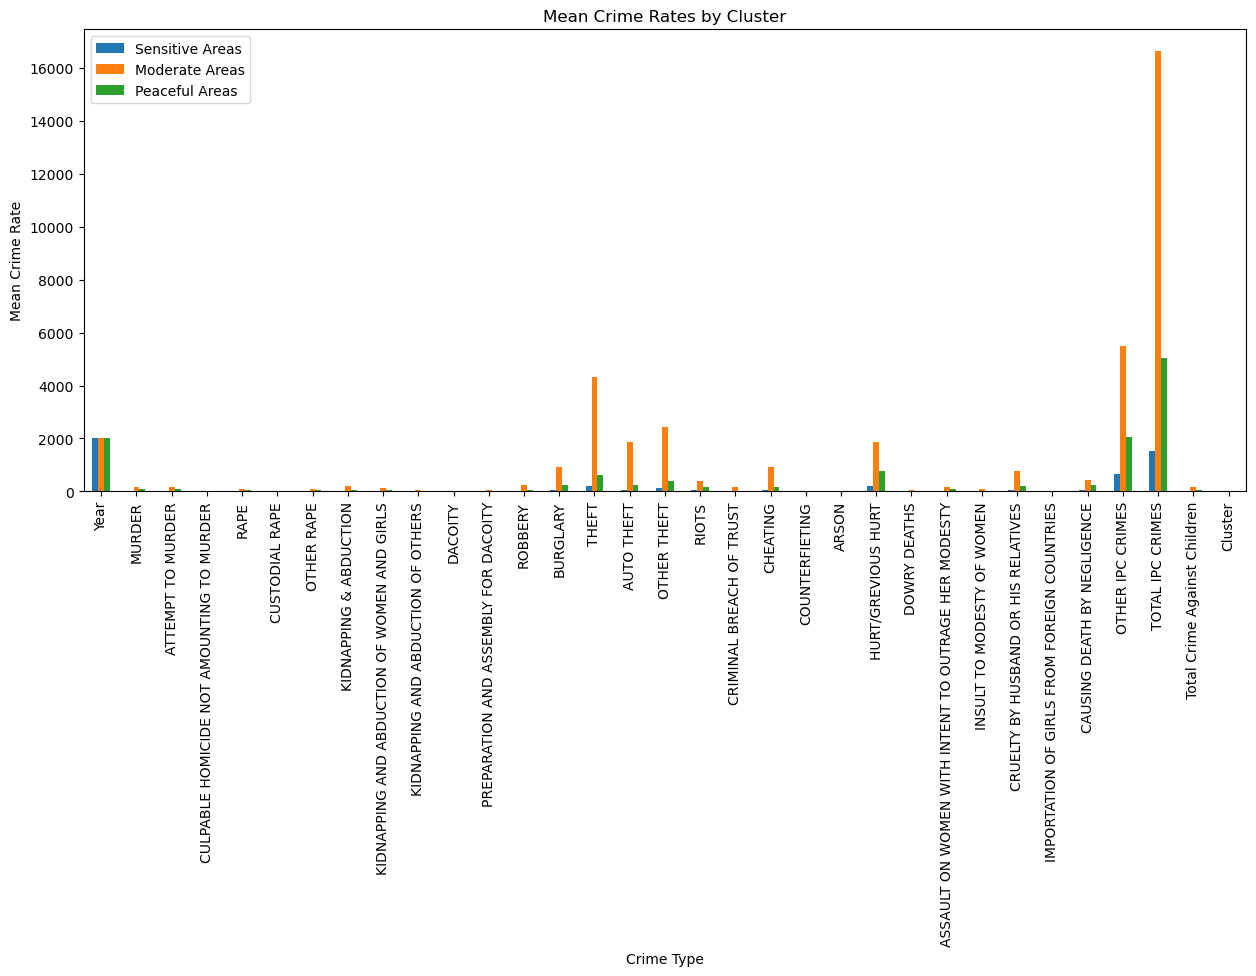

In [85]:
crime_types = sensitive_crime_means.index
mean_crime_rates = pd.DataFrame({
    'Sensitive Areas': sensitive_crime_means,
    'Moderate Areas': moderate_crime_means,
    'Peaceful Areas': peaceful_crime_means
})
mean_crime_rates.plot(kind='bar', figsize=(15, 6))
plt.title('Mean Crime Rates by Cluster')
plt.ylabel('Mean Crime Rate')
plt.xlabel('Crime Type')
plt.show()

##### 2. What needs to be done to reduce crime. 
- Increase police presence in areas with high rates of assault and kidnapping.
- Implement community outreach programs to address domestic violence.
- Enhance surveillance and rapid response teams in high-crime districts.
- The police should work closely with the community to identify and address local issues.
- People should be made aware of the consequences of crime and the importance of reporting crime. Awareness campaigns should be conducted to educate people about their rights and responsibilities.


##### 3. Most safe and unsafe districts.

In [117]:
top_crimes_sensitive = sensitive_crime_means.sort_values(ascending=False).head(5)
print('\033[1m'+"Top 5 Crimes in Sensitive Areas:"+'\033[0m')
print(top_crimes_sensitive)

Top 5 Crimes in Sensitive Areas:
Year                  2006.460824
TOTAL IPC CRIMES      1521.678149
OTHER IPC CRIMES       666.645559
HURT/GREVIOUS HURT     210.186086
THEFT                  190.007599
dtype: float64


In [118]:
unsafe_districts = sensitive_regions[['DISTRICT','STATE/UT', 'TOTAL IPC CRIMES']].sort_values(by='TOTAL IPC CRIMES', ascending=False).head(20)
safe_districts = peaceful_regions[['DISTRICT', 'STATE/UT','TOTAL IPC CRIMES']].sort_values(by='TOTAL IPC CRIMES', ascending=True).head(20)

print('\033[1m'+"Most Unsafe Districts in Sensitive Areas:"+'\033[0m')
print(unsafe_districts)

print('\033[1m'+"\nMost Safe Districts in Peaceful Areas:"+'\033[0m')
print(safe_districts)

Most Unsafe Districts in Sensitive Areas:
              DISTRICT    STATE/UT  TOTAL IPC CRIMES
6189  ERNAKULAM COMMR.      KERALA              8758
5424  ERNAKULAM COMMR.      KERALA              7961
2457          ALAPUZHA      KERALA              7082
4532          JAMNAGAR     GUJARAT              6978
1729          ALAPUZHA      KERALA              6975
1731  ERNAKULAM COMMR.      KERALA              6829
2721       KANCHIPURAM  TAMIL NADU              6807
2459  ERNAKULAM COMMR.      KERALA              6756
4676  ERNAKULAM COMMR.      KERALA              6602
8389       GANDHINAGAR     GUJARAT              6530
3791        HIMATNAGAR     GUJARAT              6525
8390        HIMATNAGAR     GUJARAT              6411
8030             ERODE  TAMIL NADU              6198
2720             ERODE  TAMIL NADU              6045
4531        HIMATNAGAR     GUJARAT              6041
4197         CUDDALORE  TAMIL NADU              6037
3193  ERNAKULAM COMMR.      KERALA              5930
548 

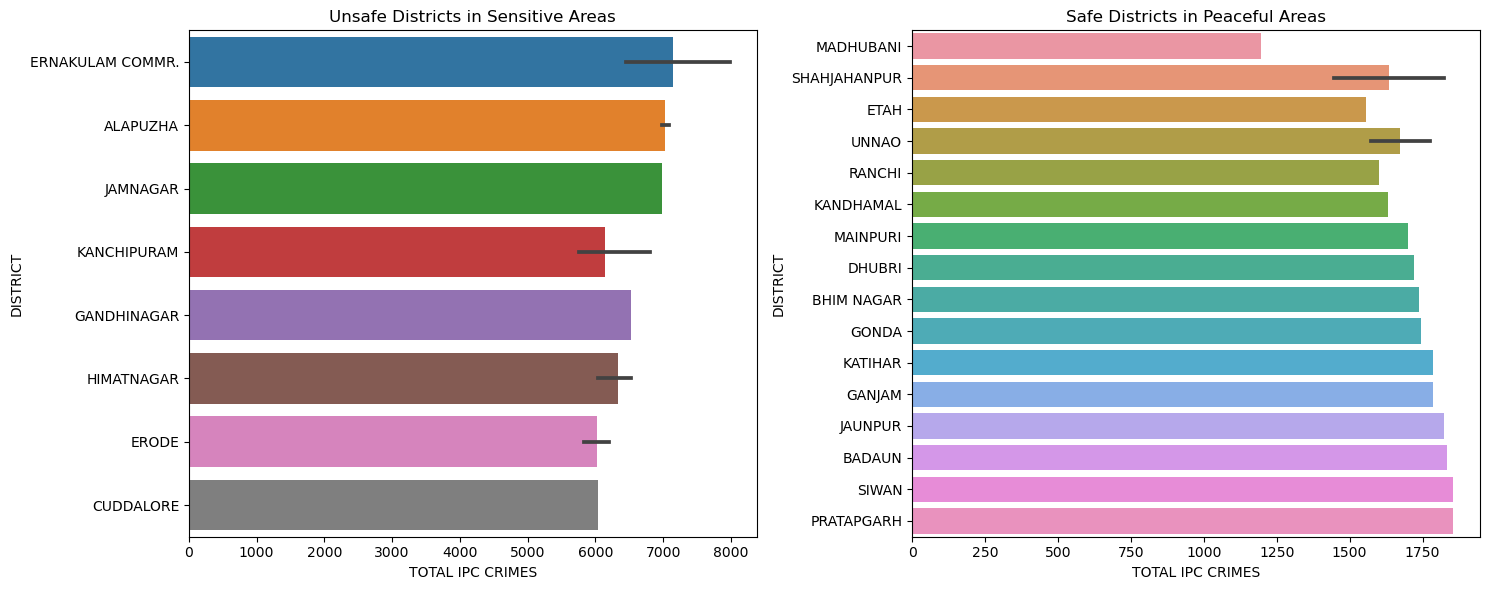

In [113]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='TOTAL IPC CRIMES', y='DISTRICT', data=unsafe_districts)
plt.title('Unsafe Districts in Sensitive Areas')
plt.subplot(1, 2, 2)
sns.barplot(x='TOTAL IPC CRIMES', y='DISTRICT', data=safe_districts)
plt.title('Safe Districts in Peaceful Areas')
plt.tight_layout()
plt.show()


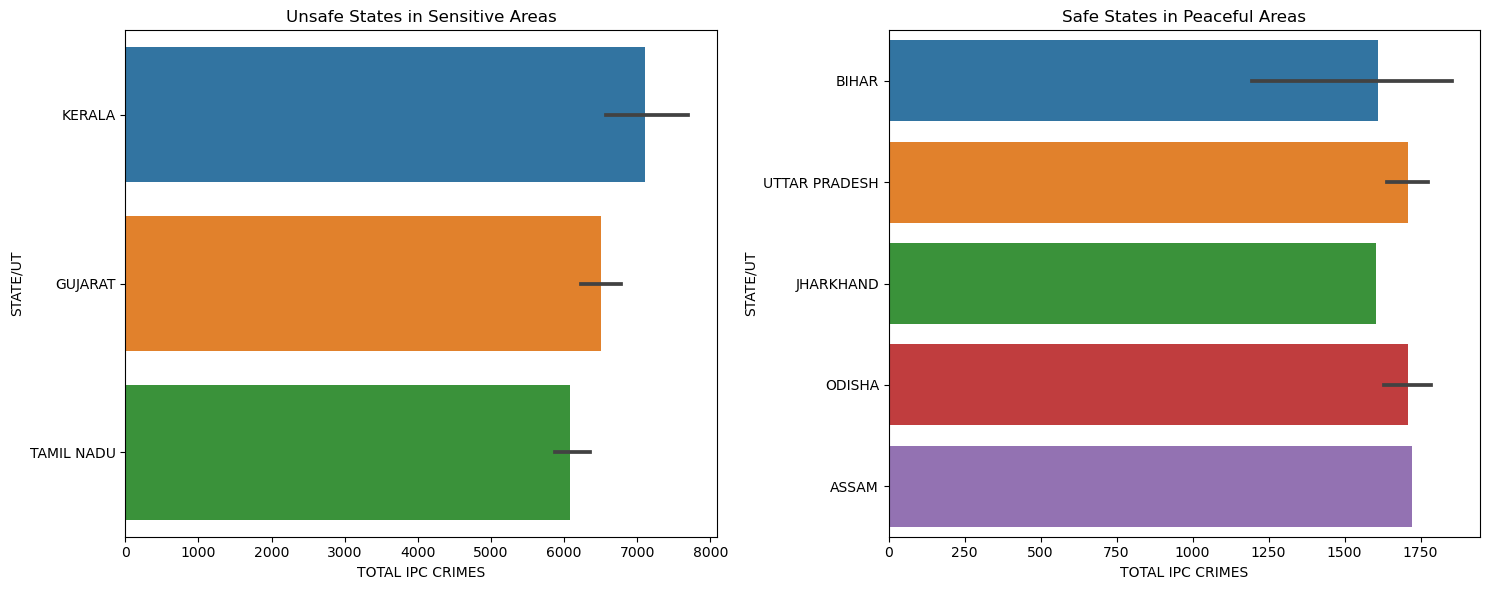

In [114]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='TOTAL IPC CRIMES', y='STATE/UT', data=unsafe_districts)
plt.title('Unsafe States in Sensitive Areas')
plt.subplot(1, 2, 2)
sns.barplot(x='TOTAL IPC CRIMES', y='STATE/UT', data=safe_districts)
plt.title('Safe States in Peaceful Areas')
plt.tight_layout()
plt.show()

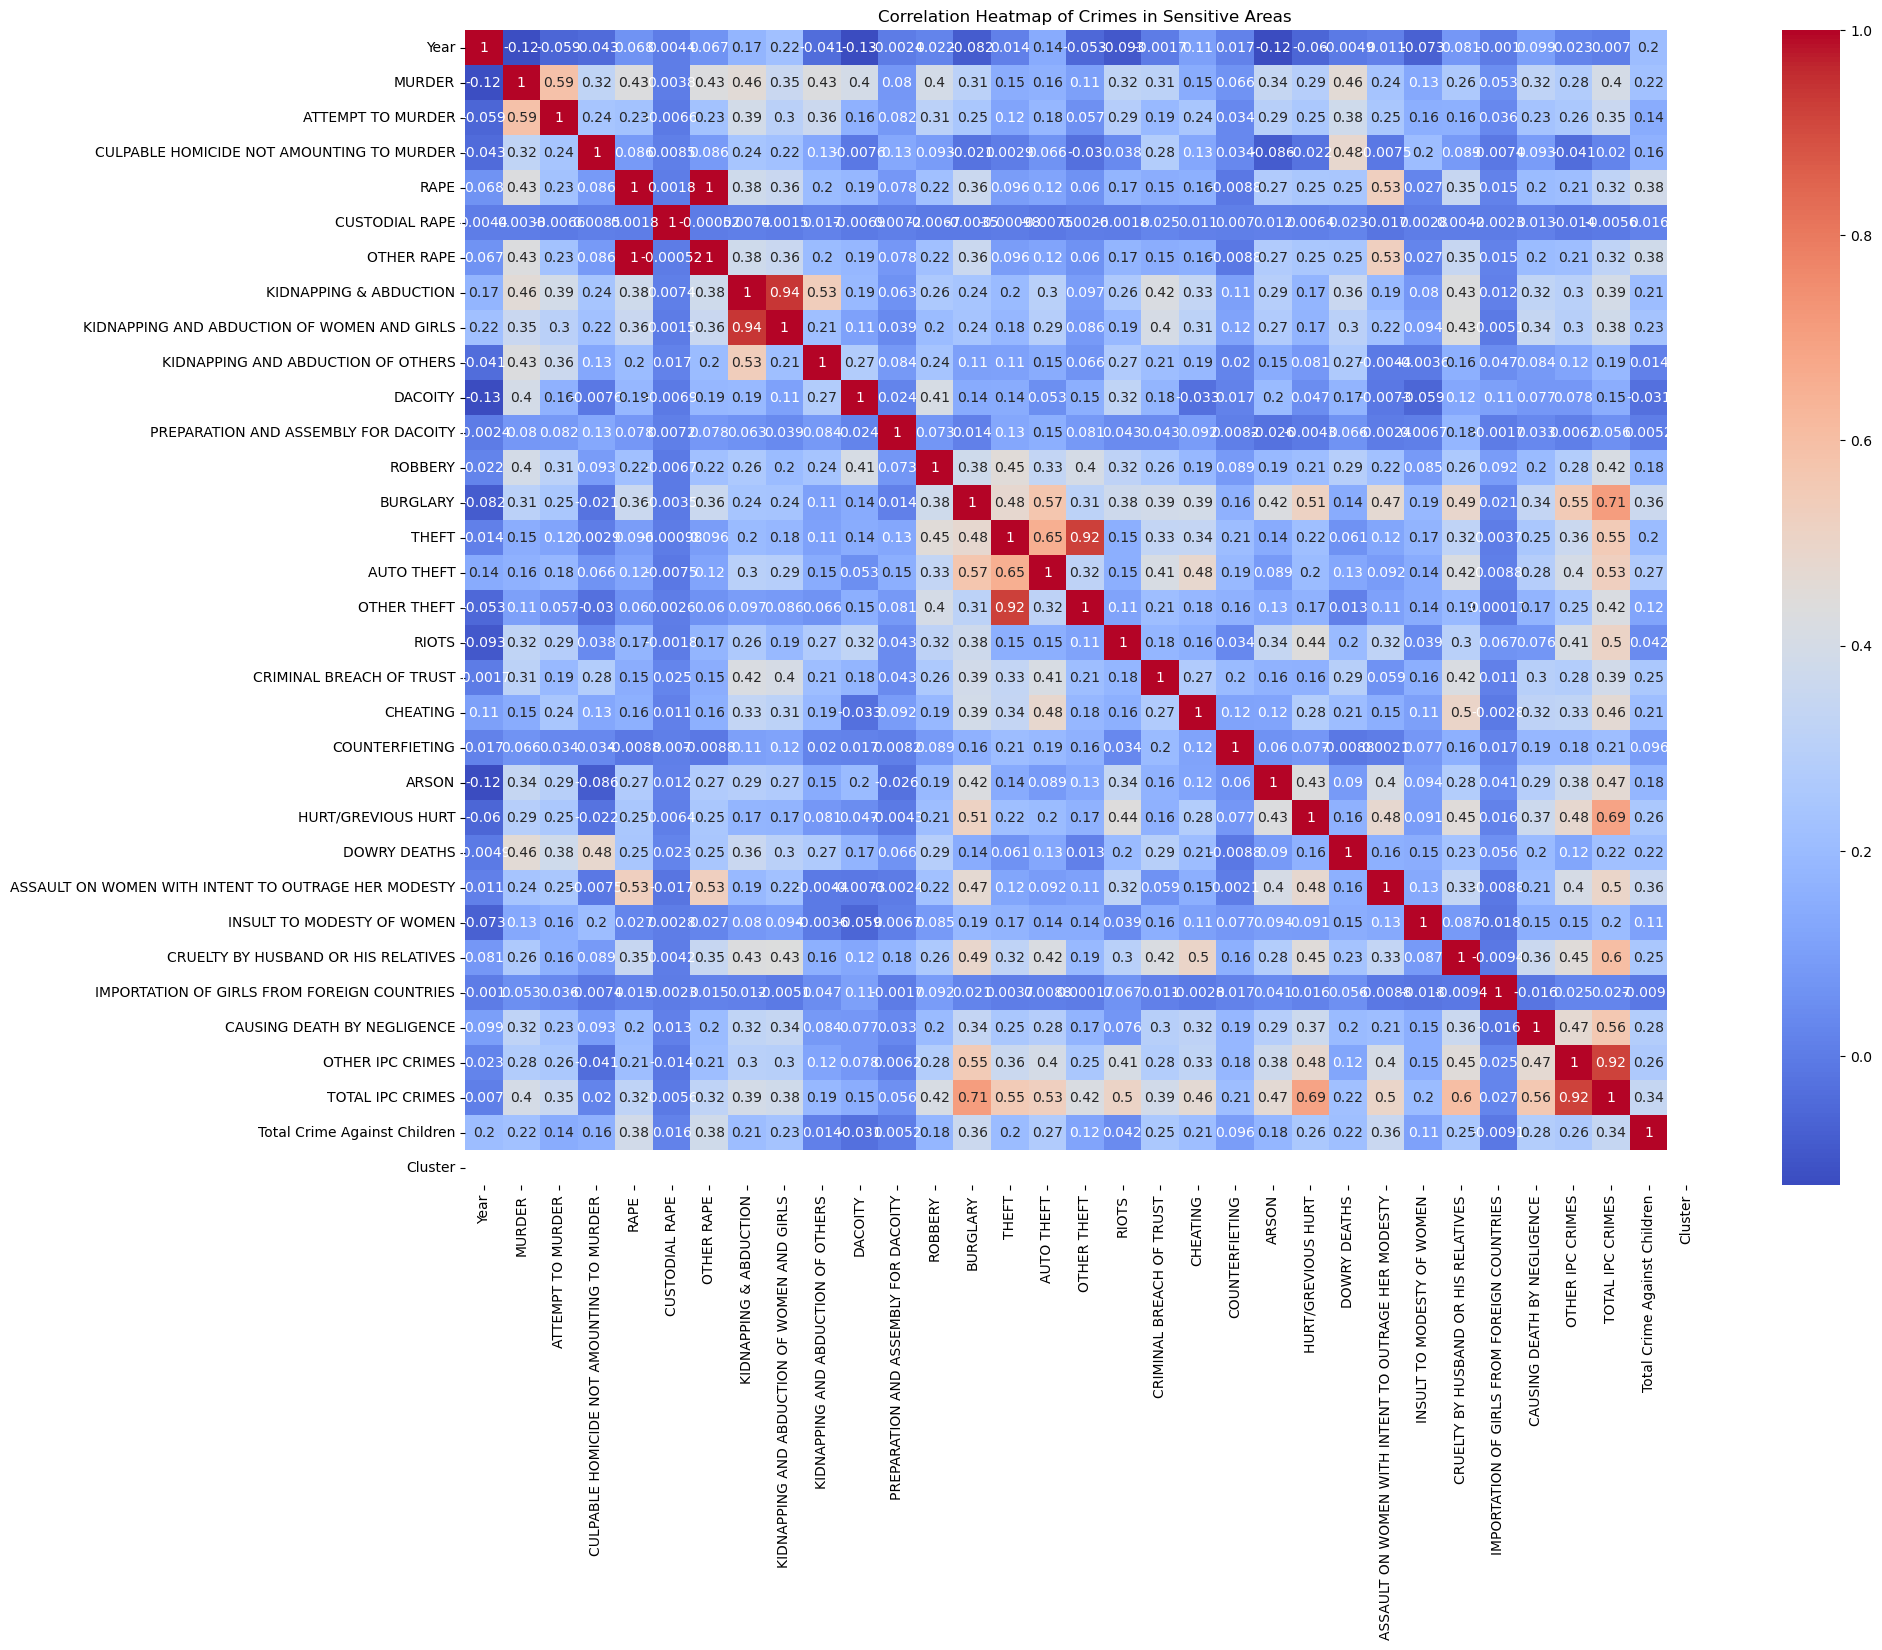

In [94]:
plt.figure(figsize=(20,15))
sns.heatmap(sensitive_regions.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Crimes in Sensitive Areas')
plt.show()

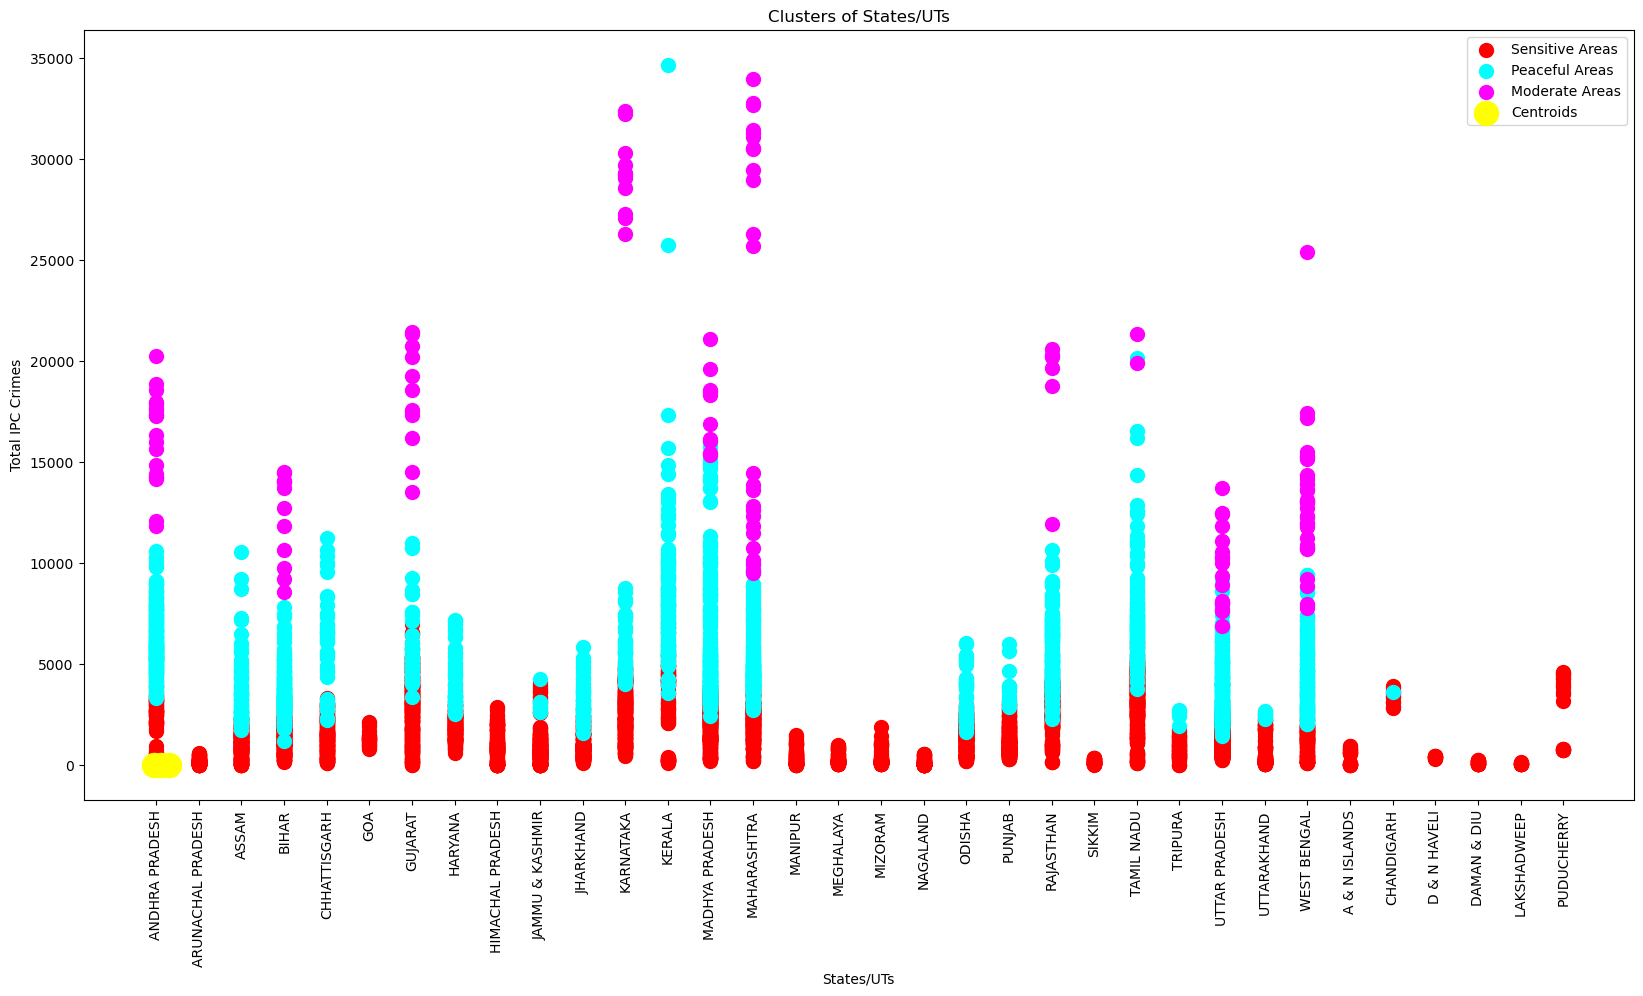

In [104]:
plt.figure(figsize=(20, 10))

plt.scatter(df_Crime[df_Crime['Cluster_Label'] == 'Sensitive Areas']['STATE/UT'],
            df_Crime[df_Crime['Cluster_Label'] == 'Sensitive Areas']['TOTAL IPC CRIMES'],
            s=100, c='red', label='Sensitive Areas')
plt.scatter(df_Crime[df_Crime['Cluster_Label'] == 'Peaceful Areas']['STATE/UT'],
            df_Crime[df_Crime['Cluster_Label'] == 'Peaceful Areas']['TOTAL IPC CRIMES'],
            s=100, c='cyan', label='Peaceful Areas')
plt.scatter(df_Crime[df_Crime['Cluster_Label'] == 'Moderate Areas']['STATE/UT'],
            df_Crime[df_Crime['Cluster_Label'] == 'Moderate Areas']['TOTAL IPC CRIMES'],
            s=100, c='magenta', label='Moderate Areas')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of States/UTs')
plt.xlabel('States/UTs')
plt.xticks(rotation=90)
plt.ylabel('Total IPC Crimes')
plt.legend()
plt.show()

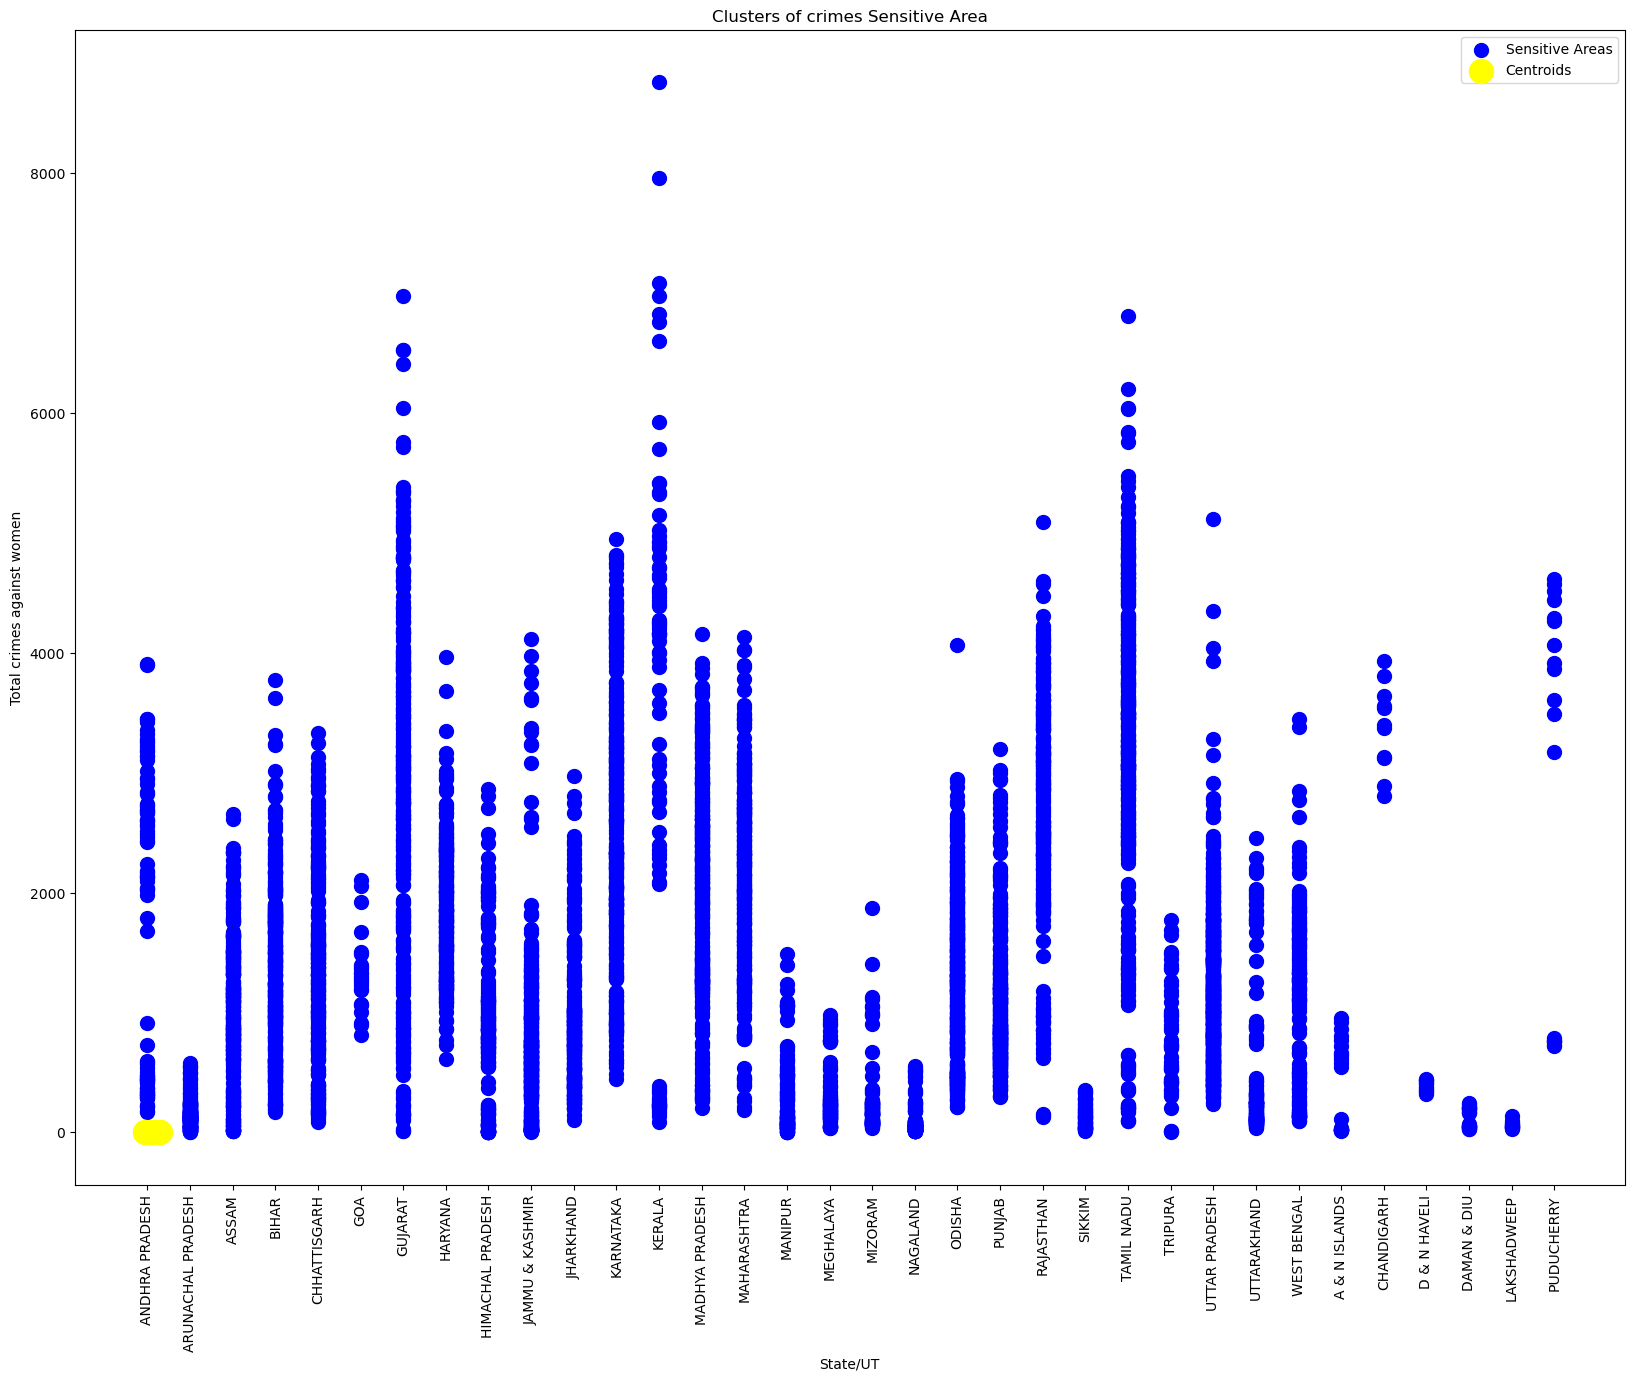

In [107]:
plt.figure(figsize=(20,15))
plt.scatter(sensitive_regions['STATE/UT'], sensitive_regions['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Sensitive Areas'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Sensitive Area')
plt.xlabel('State/UT')
plt.xticks(rotation=90)
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

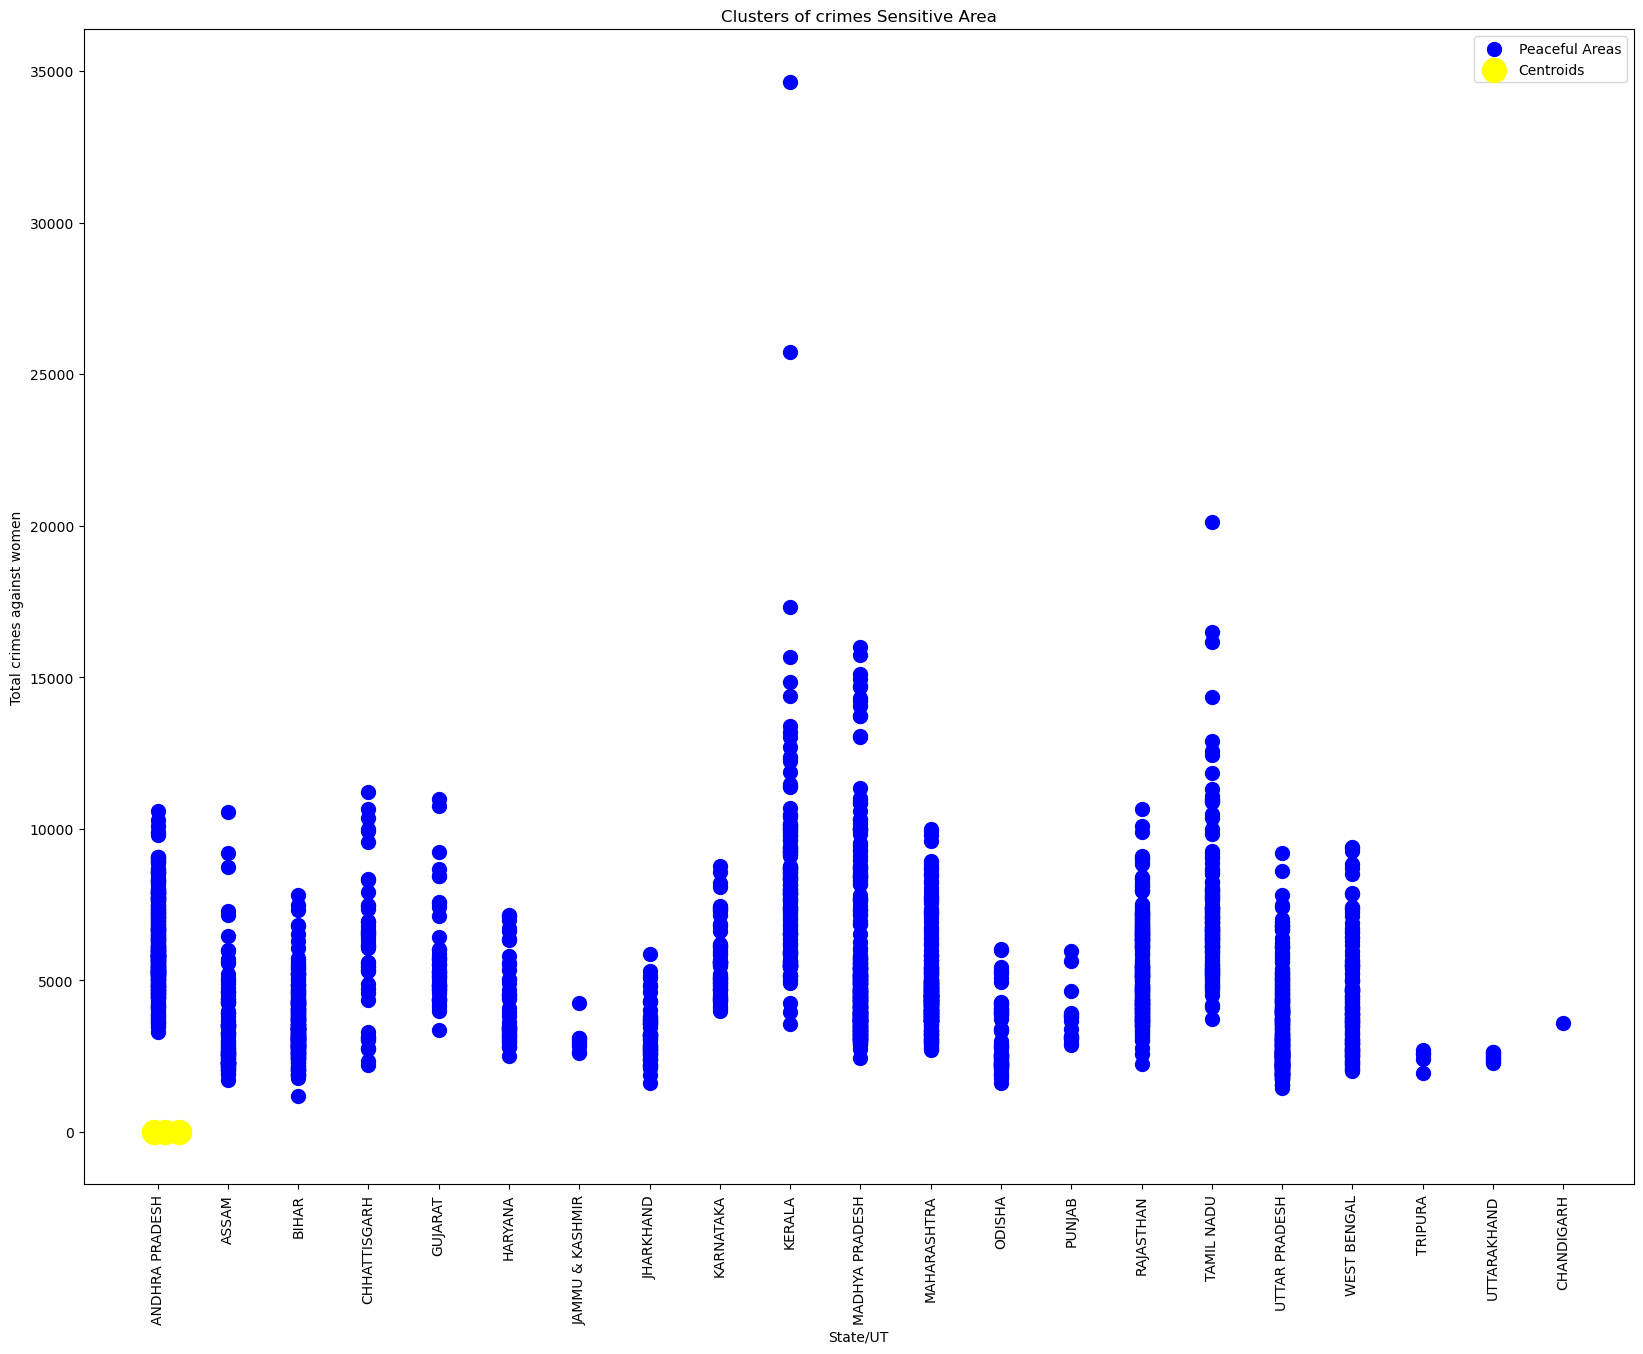

In [119]:
plt.figure(figsize=(20,15))
plt.scatter(peaceful_regions['STATE/UT'], peaceful_regions['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Peaceful Areas'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Sensitive Area')
plt.xlabel('State/UT')
plt.xticks(rotation=90)
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

OBSERVATIONS:

MOST SENSITIVE STATES:
- KERALA         
- GUJARAT  
- TAMIL NADU     
- RAJASTHAN
- KARNATAKA


MOST PEACEFUL STATES:
- BIHAR 
- UTTAR PRADESH
- JHARKHAND
- ODISHA
- ASSAM

From the above obervations we can conclude, Area of a State and it's Population plays a major role in Overall Crime

Overall Crime can be decreased with increasing the Literacy Rate or reducing the population in the state

##### 4.4   Capstone project overall story in your own words. Min 1000 words.

- Introduction: 
This project report aims to analyze crime data for various states and union territories in India and examine the factors that contribute to crime rates. The analysis focuses on two key aspects: sensitivity and peacefulness of states, and the relationship between crime rates and factors such as literacy rate, area size, and population.

- Methodology: 
The analysis is based on the provided crime data for the years 2001 and 2012. The data includes information on different types of crimes, population, literacy rates, and area sizes for each state and union territory. The states with the highest sensitivity and peacefulness were identified based on the given data.

The clustering analysis and EDA provided several valuable insights into the crime landscape in India:

- Sensitive Areas:

These districts exhibited alarmingly high rates of violent and personal crimes, such as murder, rape, and domestic violence. Socio-economic challenges, inadequate policing, and high population density were identified as potential contributing factors.
Key districts in this cluster were often urban centers or regions with significant socio-economic disparities.

- Moderate Areas:

Districts in this cluster had a mix of crimes but at moderate levels. These areas served as transition zones between sensitive and peaceful regions.
Efforts to prevent crime escalation in these areas are crucial to maintaining their status and avoiding them becoming sensitive areas.

- Peaceful Areas:

These districts had low crime rates across most categories. Effective law enforcement, community engagement, and better socio-economic conditions were likely contributing to their peaceful status.
Replicating the successful strategies from these areas in other districts could help reduce crime rates elsewhere.

- Conclusion:
This capstone project provides a comprehensive analysis of crime in India, leveraging data analytics and machine learning to uncover insights and inform strategies for crime reduction. The clustering approach helped categorize districts into sensitive, moderate, and peaceful areas, allowing for targeted interventions.

Understanding the patterns and causes of crime is essential for effective policy-making and resource allocation. By focusing on enhancing law enforcement, community programs, socio-economic development, and technological interventions, India can work towards creating safer communities and reducing crime rates across the country.

This project highlights the importance of data-driven decision-making in addressing complex social issues like crime. Continued efforts to collect, analyze, and act on crime data will be crucial in achieving long-term improvements in public safety and security.